# Business Problem

**Calories-burnt-prediction using Machine-Learning**

In today's Health-conscious society, individuals are increasingly adoptingfitness routines to maintain a healthy lifestyle. One crucial aspect of fitness is understanding the number of calories burned during physical activities. Predicting the calories burned can aid individuals in optimizing their workout routines and achieving their fitness goals. Machine Learning goals can play a vital role in accurately estimating the calories burnt based on various personal and activity related features.

**Objective :** The goal of this pproject is to develop a machine learning model that predict the number of calories burnt during physical activities.

In [1]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
# importing the Dataset

df = pd.read_csv(r'calories.csv')
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


**Data Understanding**

- **User_ID :** Unique Id of a person.
- **Gender :** Gender of a Person.
- **Age :** Age of a person in number.
- **Height :** Height of a person in cm's.
- **Weight :** Weight of a person in kg's.
- **Duration :** Duration of the Activity in min.
- **Heart_Rate :** Heart Rate of the person.
- **Body_Temp :** Body temperature of a person.
- **Calories :** Amount of Calories burnt after the Physical Activity (Target Variable).

In [3]:
df.shape

(15000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


- The Dataset is having 15000 records with 9 features.
- All the variables are in correct data type.

In [5]:
# splitting the categorical, count and continuous variables.

categorical = ['Gender']

continuous = ['Age','Height','Weight','Duration','Heart_Rate','Body_Temp','Calories']

**Data Preprocessing**

In [6]:
# Finding the unique values of the variable.

df['User_ID'].nunique()

15000

- All the values are unique. So, we can drop this column.

In [7]:
df['Gender'].unique()

array(['male', 'female'], dtype=object)

In [8]:
df['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

In [9]:
df[continuous].describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


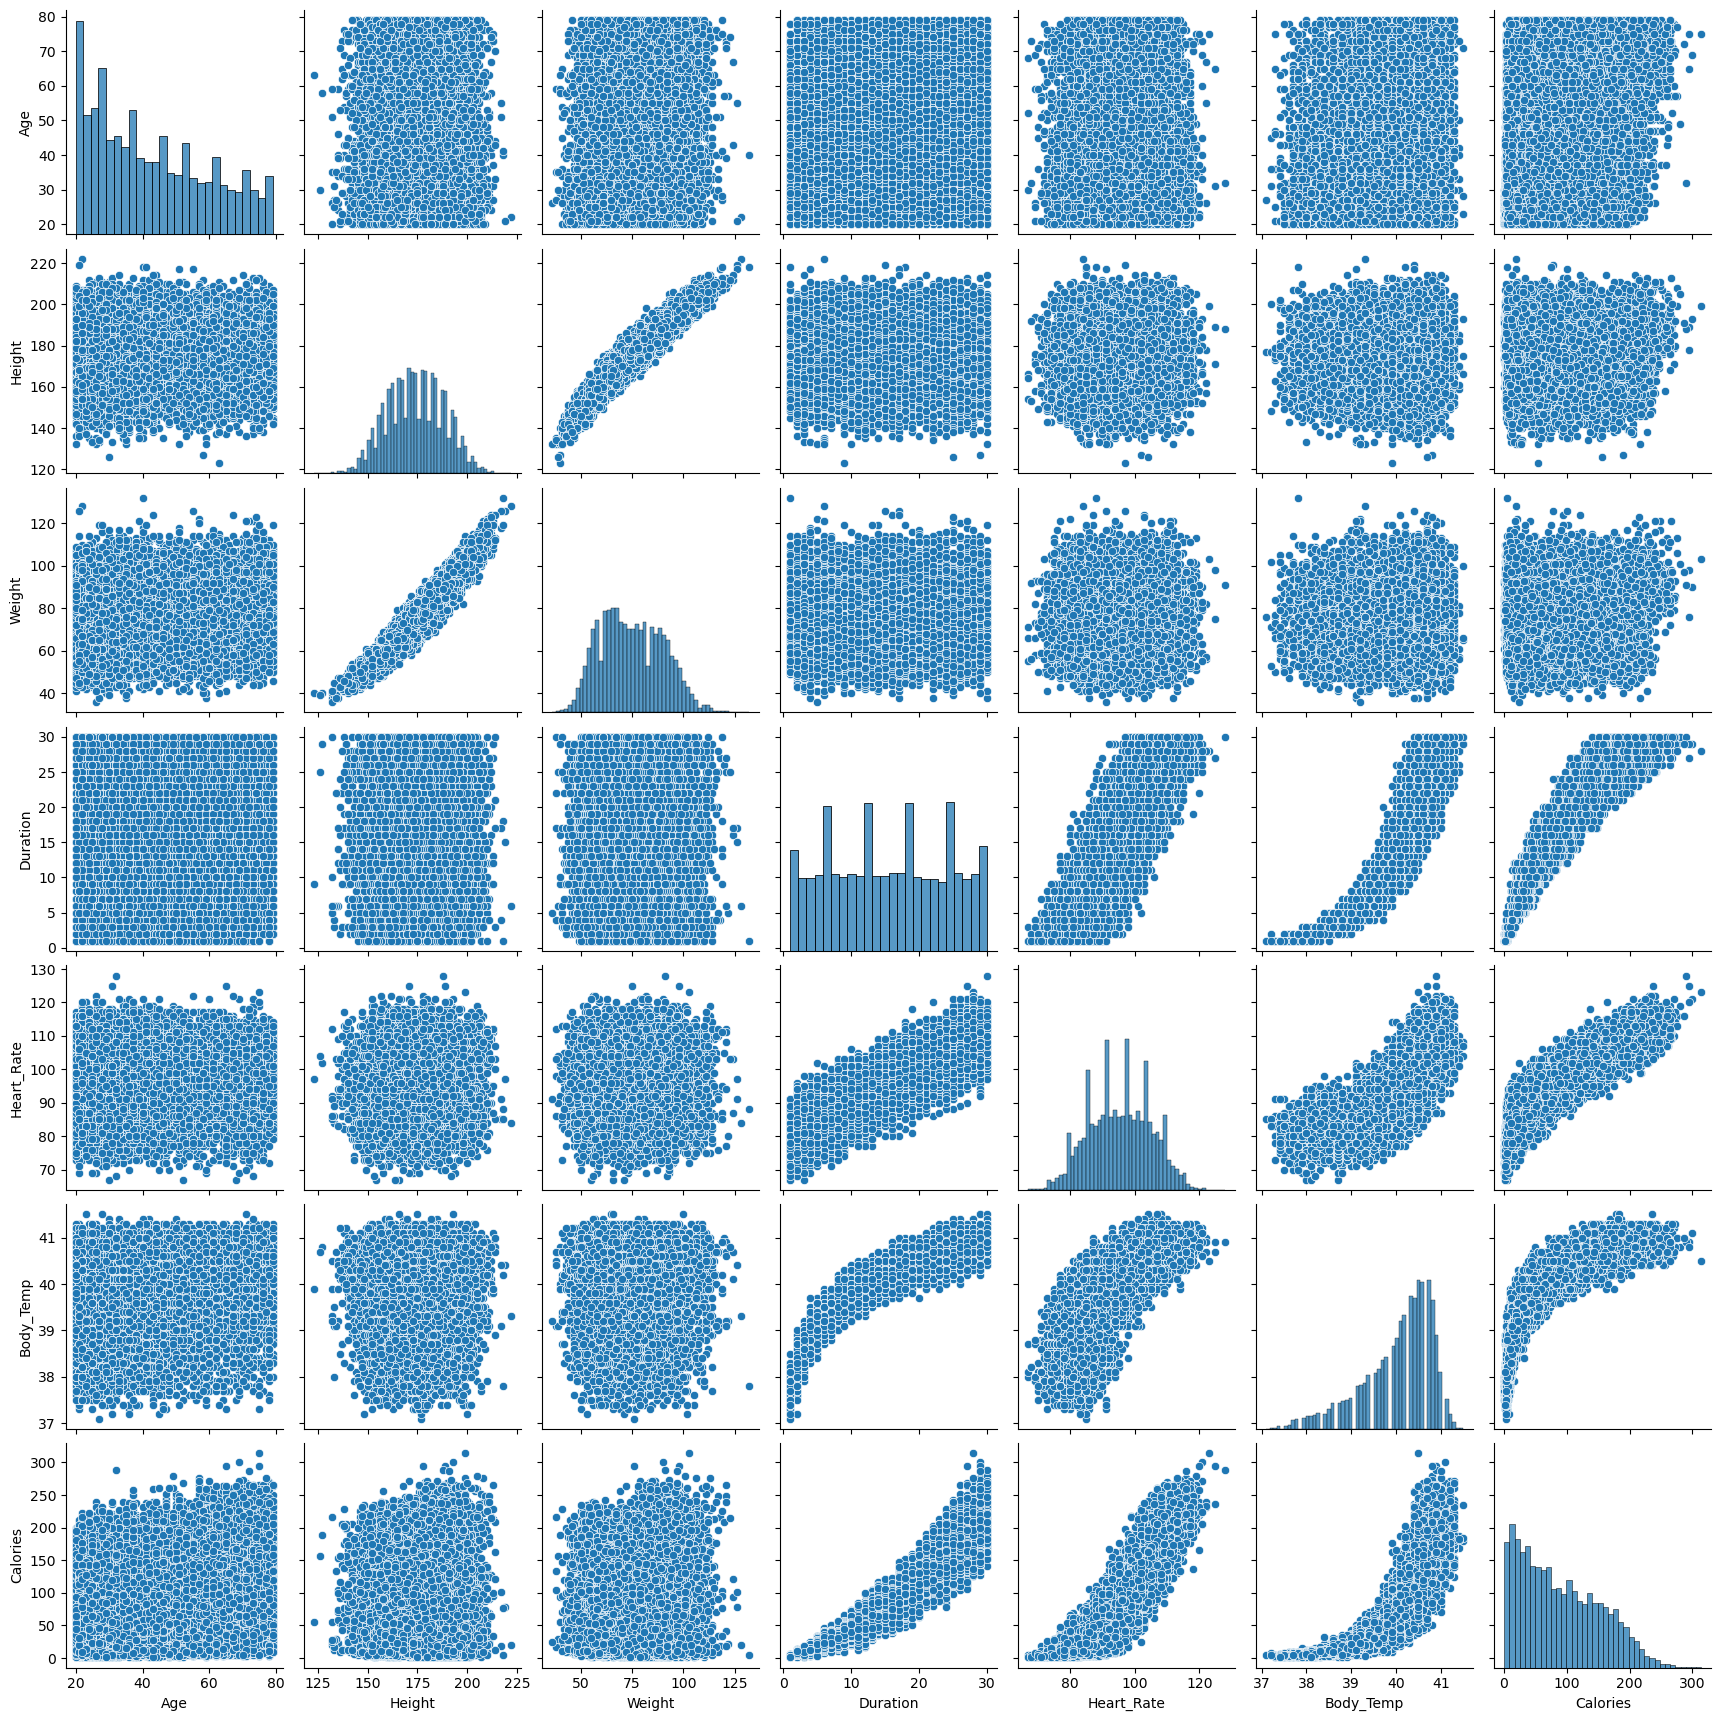

In [10]:
sns.pairplot(df[continuous])
plt.show()

- The above pair plot shows that some of the variables are not showing the linear relationship.

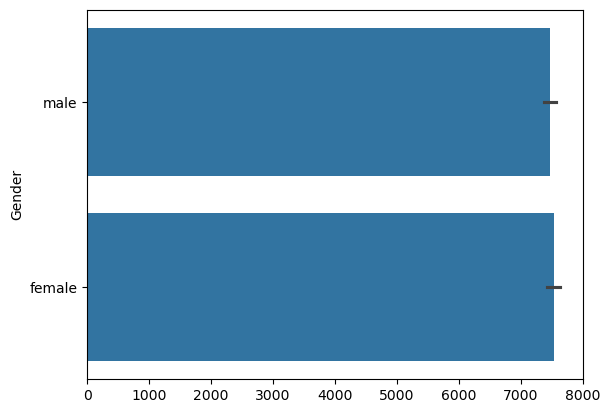

In [11]:
sns.barplot(df['Gender'])
plt.show()

In [12]:
# Checking whether the dataset has any missing values

df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

- There are no missing values.

In [13]:
# checking whether there are any duplicate records are present

df.duplicated().sum()

0

- There are no duplicate records present.

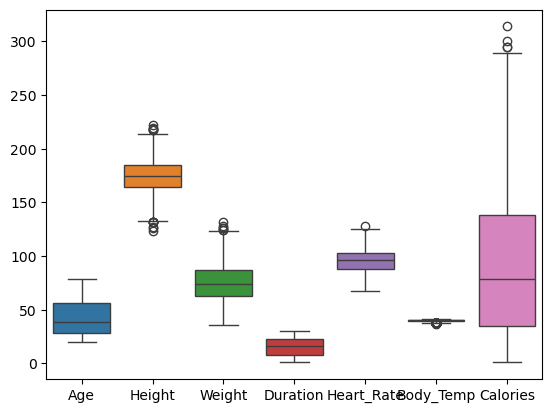

In [14]:
# Check whether there are any outliers

sns.boxplot(df[continuous])
plt.show()

- Some of the features are having the Outliers.

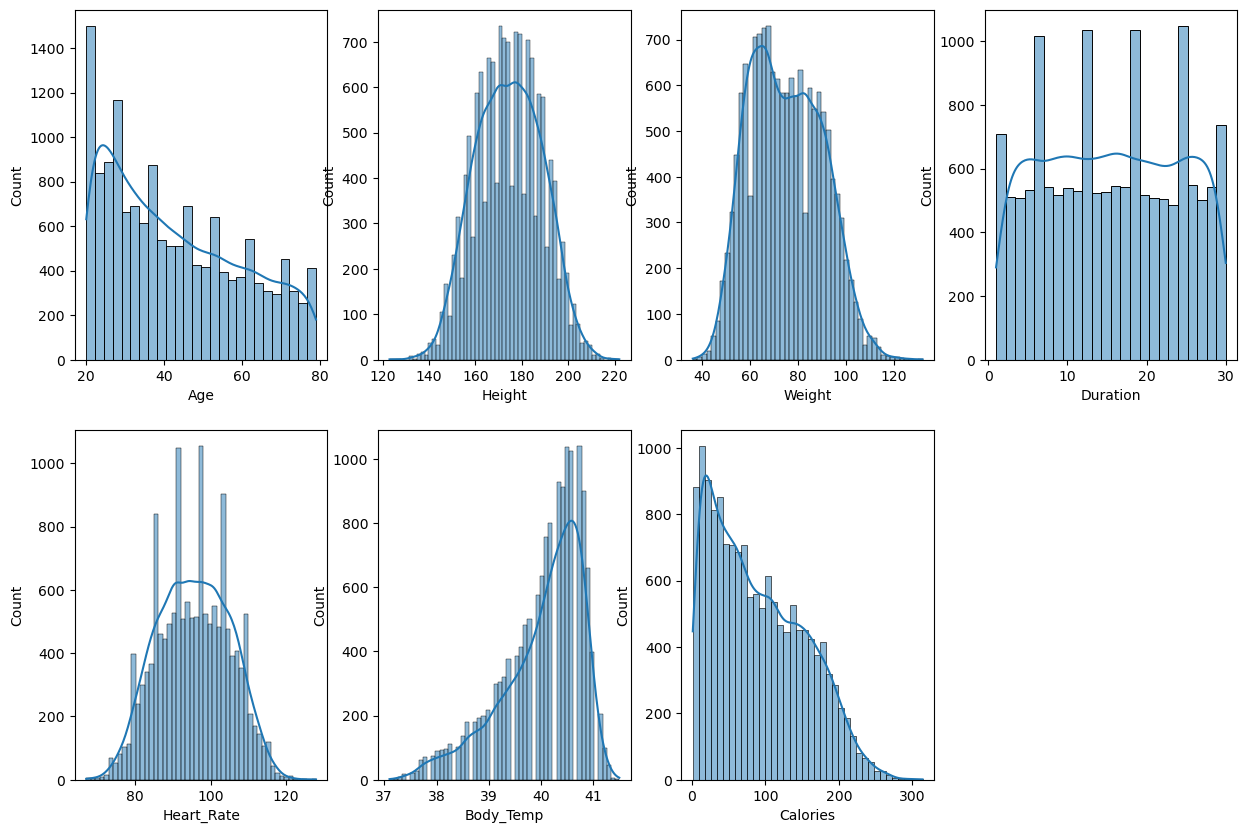

In [15]:
# checking the normality 

plt.figure(figsize=(15,10))

plt.subplot(2,4,1)
sns.histplot(df['Age'],kde=True)

plt.subplot(2,4,2)
sns.histplot(df['Height'],kde=True)

plt.subplot(2,4,3)
sns.histplot(df['Weight'],kde=True)

plt.subplot(2,4,4)
sns.histplot(df['Duration'],kde=True)

plt.subplot(2,4,5)
sns.histplot(df['Heart_Rate'],kde=True)

plt.subplot(2,4,6)
sns.histplot(df['Body_Temp'],kde=True)

plt.subplot(2,4,7)
sns.histplot(df['Calories'],kde=True)

plt.show()

In [16]:
df[continuous].skew()

Age           0.473383
Height       -0.006190
Weight        0.226725
Duration      0.004751
Heart_Rate   -0.010704
Body_Temp    -0.994382
Calories      0.505371
dtype: float64

- For every feature the skewness value is between -1 to +1.
- which means the data is normally distributed and no need for transformation of data.

In [17]:
corr = df[continuous].corr()
corr

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Age,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


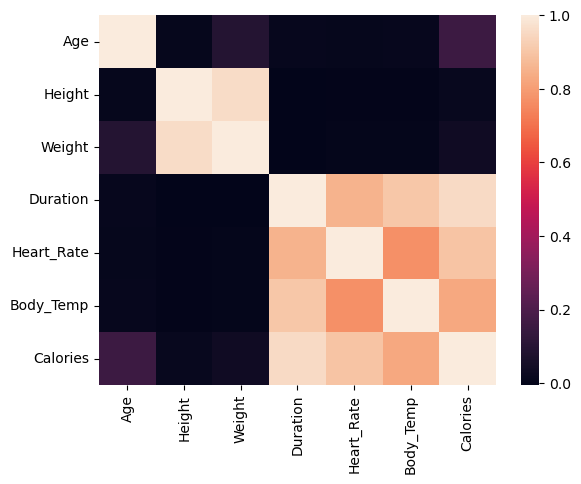

In [18]:
sns.heatmap(corr)
plt.show()

- The correlation between the two independent variables should be <0.5. The correlation between the dependent and independent variable should be >0.2.
- If any of the features does not satisfies the above conndition we have to drop those features.

In [19]:
# Calculate the Variance Inflation Factors (VIF) values of independent variables.

import statsmodels.formula.api as smf

rsq_age = smf.ols('Age~Height+Weight+Duration+Heart_Rate+Body_Temp',data=df).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_ht = smf.ols('Height~Age+Weight+Duration+Heart_Rate+Body_Temp',data=df).fit().rsquared
vif_ht = 1/(1-rsq_ht)

rsq_wt = smf.ols('Weight~Age+Height+Duration+Heart_Rate+Body_Temp',data=df).fit().rsquared
vif_wt = 1/(1-rsq_wt)

rsq_dt = smf.ols('Duration~Age+Height+Weight+Heart_Rate+Body_Temp',data=df).fit().rsquared
vif_dt = 1/(1-rsq_dt)

rsq_hr = smf.ols('Heart_Rate~Age+Height+Weight+Duration+Body_Temp',data=df).fit().rsquared
vif_hr = 1/(1-rsq_hr)

rsq_bt = smf.ols('Body_Temp~Age+Height+Weight+Duration+Heart_Rate',data=df).fit().rsquared
vif_bt = 1/(1-rsq_bt)

d1 = {'Variables':['Age','Height','Weight','Duration','Heart_Rate','Body_Temp'],'vif values':[vif_age,vif_ht,vif_wt,vif_dt,vif_hr,vif_bt]}
vif_dataframe = pd.DataFrame(d1)
vif_dataframe

,Variables,vif values
0,Age,1.087827
1,Height,13.259685
2,Weight,13.367861
3,Duration,8.059124
4,Heart_Rate,3.669088
5,Body_Temp,5.427413


- In general if the vif value is greater than 5 there will be the multicollinearity.
- So, drop the variables with vif values greater than 5.

**Feature Selection**

In [20]:
# dropping the variables from the Dataset

df = df.drop(columns=['User_ID','Height','Weight','Duration','Body_Temp'])
df

,Gender,Age,Heart_Rate,Calories
0,male,68,105.0,231.0
1,female,20,94.0,66.0
2,male,69,88.0,26.0
3,female,34,100.0,71.0
4,female,27,81.0,35.0
...,...,...,...,...
14995,female,20,92.0,45.0
14996,female,27,85.0,23.0
14997,female,43,90.0,75.0
14998,male,78,84.0,11.0


**Data Cleaning**

In [21]:
# There are no missing values
# Missing values treatment is not required

# There are outliers in Height, Weight, Heart Rate, Body Temperature, Calories.
# In all the variables there is the possibility of the values to be higher than maximum and lower than the minimum values. So we can retrain the outliers.

**Data Wrangling**

In [22]:
# The data is normally distributed.

# convert categorical variables to count variables.
df = pd.get_dummies(df,dtype='int',drop_first=True)
df

,Age,Heart_Rate,Calories,Gender_male
0,68,105.0,231.0,1
1,20,94.0,66.0,0
2,69,88.0,26.0,1
3,34,100.0,71.0,0
4,27,81.0,35.0,0
...,...,...,...,...
14995,20,92.0,45.0,0
14996,27,85.0,23.0,0
14997,43,90.0,75.0,0
14998,78,84.0,11.0,1


**Finding the best random state number**

In [23]:
train = []
cv = []

X = df.drop(columns=['Calories'])
y = df['Calories']

for i in range(1,100):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=i)
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(x_train,y_train)
    ypred_train = model.predict(x_train)
    from sklearn.metrics import r2_score
    train.append(r2_score(y_train,ypred_train))
    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(model,x_train,y_train,cv=5).mean())

data = pd.DataFrame({'train':train,'cv':cv})
data2 = data[(abs(data['train']-data['cv'])<=0.05)]
rs = data2[data2['cv']==data2['cv'].max()].index.tolist()[0]
print('Best random state number is :',rs)

Best random state number is : 42


In [24]:
df.to_csv('clean.csv',index=False)